In [34]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
#from sklearn.neighbors import KernelDensity
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

##################################################
# Gerando os dados aleatórios utilizando uma distribuição beta
##################################################
a  = 2
b  = 5
Ns = 1000
X     = np.random.beta(a,b,Ns)
# Escolhendo o número de bins a partir do método da raiz quadrada
Nbins = round(m.sqrt(Ns))
Nksd  = round(0.1*Ns)

##################################################
# Gerando os dados do histograma
##################################################
freq , bin_edges = np.histogram(X, bins=Nbins)
X_bins           = bin_edges[:-1]
binwidth         = (X.max() - X.min())/(Nbins - 1)
# Normalizando os dados
X_freq           = freq/(Ns*binwidth)
# Calculando a área do histograma
area             = binwidth*sum(freq)

##################################################
# Estimando a PDF
##################################################
X_supp1          = np.linspace(X.min(), X.max(), Ns)
X_kde = stats.gaussian_kde(X)
X_ksd = X_kde(X_supp1)
#X_kde            = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
#X_ksd            = np.exp(X_kde.score_samples(X_supp1))
# Outra opção seria usar o scipy.stats.guassian_kde(), que faz a estimativa usando um nucleo gaussiano.
# A função ksdensity() do Matlab usa uma distribuição normal, por padrão.
# A vantagem da sklearn.neighbors.KernelDensity é que o núcleo pode ser outro.
# Ver: https://stackoverflow.com/a/28573811/11380901
#      https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity
#      https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

##################################################
# Estimando a CDF
##################################################
X_cdf = ECDF(X)


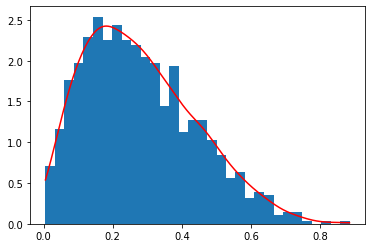

In [35]:
plt.bar(X_bins , X_freq , binwidth , align='edge')
plt.plot(X_supp1 , X_ksd , 'r')